# Media Sentiment on Twitter

In [34]:
# dependencies
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# import datetime function
from datetime import datetime

# import and initialize sentiment analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

In [35]:
# setup Tweepy API authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

### Collect Data

In [36]:
# define twitter handles to search
target_users = ["BBCWorld", "CBSNews","CNN", "FoxNews", "nytimes" ]

# array to hold sentiment
sentiments = []

# loop through users
for target in target_users:

    counter = 0
    
    # know what user code is on
    print(f"Retrieving data for {target}")
    
    # collect 100 tweets from user timeline
    public_tweets = api.user_timeline(target, count=100)
    
    # loop through all tweets
    for tweet in public_tweets:
        text = tweet["text"]
        counter += 1
        
      # run vader analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        # Add each value to the sentiments array
        sentiments.append({"Account": target,
                           "Text": tweet["text"],
                           "Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        

Retrieving data for BBCWorld
Retrieving data for CBSNews
Retrieving data for CNN
Retrieving data for FoxNews
Retrieving data for nytimes


In [38]:
# save sentiments array to dataframe
sentiments_df = pd.DataFrame.from_dict(sentiments)
sentiments_df = sentiments_df[["Tweets Ago","Account","Date","Positive","Neutral","Negative","Compound","Text"]]

#save to csv
analysis_date = datetime.now().date()
sentiments_df.to_csv(f"MediaSentiment{analysis_date}.csv", index = False)

### Plot Data

In [39]:
# create individual dataframes for each account
bbc_df = sentiments_df[sentiments_df["Account"] == "BBCWorld"]
cbs_df = sentiments_df[sentiments_df["Account"] == "CBSNews"]
cnn_df = sentiments_df[sentiments_df["Account"] == "CNN"]
fox_df = sentiments_df[sentiments_df["Account"] == "FoxNews"]
nyt_df = sentiments_df[sentiments_df["Account"] == "nytimes"]

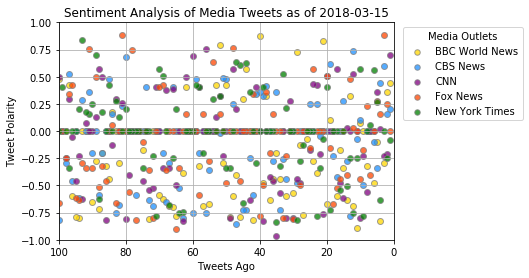

In [46]:
# build scatter plot for each news outlet
import seaborn as sns

# BBC News
plt.scatter(bbc_df["Tweets Ago"], bbc_df["Compound"], marker = "o", 
            c = "gold", edgecolors="gray", label="BBC World News", 
            alpha=0.75,)
# CBS News
plt.scatter(cbs_df["Tweets Ago"], cbs_df["Compound"], marker = "o", 
            c = "dodgerblue", edgecolors="gray", label="CBS News", 
            alpha=0.75)
# CNN
plt.scatter(cnn_df["Tweets Ago"], cnn_df["Compound"], marker = "o", 
            c = "purple", edgecolors = "gray", label="CNN", 
            alpha=0.75)
# Fox News
plt.scatter(fox_df["Tweets Ago"], fox_df["Compound"], marker = "o", 
            c = "orangered", edgecolors="gray", label="Fox News", 
            alpha=0.75)
# New York Times
plt.scatter(nyt_df["Tweets Ago"], nyt_df["Compound"], marker = "o", 
            c = "green", edgecolors="gray", label="New York Times", 
            alpha=0.75)


# define plot characteristics

plt.title(f"Sentiment Analysis of Media Tweets as of {analysis_date}")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

plt.xlim(100, 0)
plt.ylim(-1, 1)
plt.grid()

lgnd= plt.legend(bbox_to_anchor = (1.4, 1), loc = "upper right", scatterpoints = 1, 
                 fontsize = 10, title = "Media Outlets")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
lgnd.legendHandles[3]._sizes = [30]
lgnd.legendHandles[4]._sizes = [30]

plt.fig_size = (20,20)
plt.savefig(f"MediaSentimentPlot{analysis_date}.png")
plt.show()

In [41]:
# group data by media outlet
groupby_media_df = sentiments_df.groupby(["Account"], as_index = False)
groupby_media_df.head()

,Tweets Ago,Account,Date,Positive,Neutral,Negative,Compound,Text
0,1,BBCWorld,Thu Mar 15 15:22:00 +0000 2018,0.214,0.087,0.699,0.4417,"""It certainly looks like the Russians were beh..."
1,2,BBCWorld,Thu Mar 15 15:12:36 +0000 2018,0.128,0.000,0.872,0.3612,RT @BBCJonSopel: .@realDonaldTrump comments on...
2,3,BBCWorld,Thu Mar 15 14:59:05 +0000 2018,0.000,0.128,0.872,-0.2960,RT @BBCBreaking: US places sanctions on Russia...
3,4,BBCWorld,Thu Mar 15 14:56:37 +0000 2018,0.000,0.521,0.479,-0.8225,Mariam Moustafa: Egyptian teen's Nottingham de...
4,5,BBCWorld,Thu Mar 15 14:56:37 +0000 2018,0.000,0.189,0.811,-0.1027,US imposes sanctions on 19 Russians https://t....
100,1,CBSNews,Thu Mar 15 15:21:29 +0000 2018,0.107,0.000,0.893,0.2023,Treasury Department announces new sanctions ag...
101,2,CBSNews,Thu Mar 15 15:13:56 +0000 2018,0.120,0.000,0.880,0.1531,"""There will always be change and I think you w..."
102,3,CBSNews,Thu Mar 15 15:12:18 +0000 2018,0.205,0.000,0.795,0.5994,"""It certainly looks like the Russians were beh..."
103,4,CBSNews,Thu Mar 15 15:09:55 +0000 2018,0.127,0.000,0.873,0.4404,MOMENTS AGO: President Trump is welcoming Prim...
104,5,CBSNews,Thu Mar 15 15:05:38 +0000 2018,0.000,0.103,0.897,-0.3400,An NYPD truck caught fire while setting up for...


In [42]:
# get mean of compound for each outlet
average_compound = groupby_media_df["Compound"].mean()
average_compound.head()

,Account,Compound
0,BBCWorld,-0.182023
1,CBSNews,-0.085604
2,CNN,-0.074047
3,FoxNews,-0.076884
4,nytimes,-0.030358


In [43]:
# data for bar chart
outlets = average_compound["Account"]
compound = average_compound["Compound"]
x_axis = np.arange(0, len(outlets), 1)

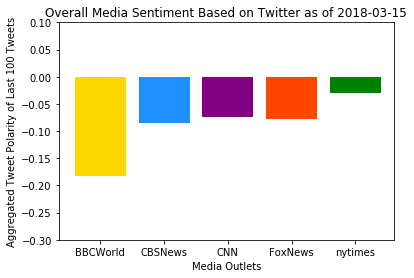

In [45]:
# set graph basis
plt.bar(x_axis, compound, color = ["gold","dodgerblue","purple","orangered","green"], align="edge")
tick_locations = [value + 0.4 for value in x_axis]
plt.xticks(tick_locations, outlets)

# set the axis limits
plt.xlim(-0.25, len(x_axis))
plt.ylim(-.3, .1)

# chart labels
plt.title(f"Overall Media Sentiment Based on Twitter as of {analysis_date}")
plt.xlabel("Media Outlets")
plt.ylabel("Aggregated Tweet Polarity of Last 100 Tweets")

# Save an image of the chart and print it to the screen
plt.savefig(f"MediaSentimentBar{analysis_date}.png")

plt.show()